# 单摆
参考网址：https://www.bilibili.com/video/BV1tb411G72z/?spm_id_from=333.999.0.0&vd_source=099edd8ba094e7ddc14190b99d15a5fe

给定重力加速度g，摆长l，

给定角度初值$\theta$, 以及初速度$\.\theta$

![image.png](../assert/image.png)

In [ ]:
import numpy as np

# 物理常数
g = 9.8
l = 2
miu = 0.1

# 初始条件
THETA_0 = np.pi / 3
THETA_DOT_0 = 0      #初速度为0

# 定义ODE
def get_theta_double_dot(theta, theta_dot):
    return -miu * theta_dot - g / l * np.sin(theta)

# 模拟
def theta(t):
    # 初始化变量
    theta = THETA_0
    theta_dot = THETA_DOT_0 
    delta_t = 0.01   # 时间步长
    for time in np.arange(0, t, delta_t):
        theta_double_dot = get_theta_double_dot(theta, theta_dot)
        theta += theta_dot * delta_t
        theta_dot += theta_double_dot * delta_t

    return theta

# 给定时间t，求角度theta
theta(1)

-0.46763182270170545

## 绘图版本

start draw animation, len datas: 10001


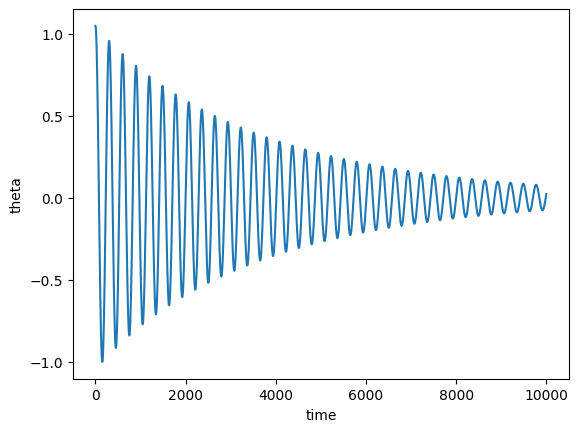

0.02281965214703735

In [12]:
from contextlib import contextmanager
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
# 通过上下文管理器封装之后，我们只需要实现drwa函数即可
# 在drwa函数中，实现第一幅图的绘制，在函数里面再实现一个update函数即可。
# 为了提高效率，update通常是通过句柄来更新数据，而不是再次绘制一次图。


@contextmanager
def draw_theta():
    try:
        datas = []
        yield datas
    finally:
        print('start draw animation, len datas:', len(datas))
        plt.plot(datas)
        plt.xlabel('time')
        plt.ylabel('theta')
        plt.show()


import numpy as np

# 物理常数
g = 9.8
l = 2
miu = 0.1

# 初始条件
THETA_0 = np.pi / 3
THETA_DOT_0 = 0      #初速度为0

# 定义ODE
def get_theta_double_dot(theta, theta_dot):
    return -miu * theta_dot - g / l * np.sin(theta)

# 模拟
def theta(t):
    # 初始化变量
    theta = THETA_0
    theta_dot = THETA_DOT_0 
    delta_t = 0.01   # 时间步长
    with draw_theta() as datas:
        datas.append(theta)
        for time in np.arange(0, t, delta_t):
            theta_double_dot = get_theta_double_dot(theta, theta_dot)
            theta += theta_dot * delta_t
            theta_dot += theta_double_dot * delta_t
            datas.append(theta)

    return theta

# 给定时间t，求角度theta
theta(100)



